In [10]:
# ------------------------------
# Step 1: Import Libraries
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
# ------------------------------
# Step 2: Generate Synthetic Dataset
# ------------------------------
np.random.seed(42)

n_samples = 1000
data = pd.DataFrame({
    "Ad_Budget": np.random.randint(1000, 10000, n_samples),           # Ad spend
    "Ad_Platform": np.random.choice(["Google", "Meta", "LinkedIn"], n_samples),
    "Ad_Type": np.random.choice(["Video", "Image", "Text"], n_samples),
    "Audience_Age": np.random.choice(["18-24", "25-34", "35-44", "45+"], n_samples),
    "Audience_Interest": np.random.choice(["Tech", "Fashion", "Sports", "Finance"], n_samples),
    "Clicks": np.random.randint(0, 500, n_samples),                   # Number of clicks
    "Impressions": np.random.randint(1000, 10000, n_samples)          # Number of views
})

# Calculate CTR (Click Through Rate)
data["CTR"] = (data["Clicks"] / data["Impressions"]) * 100

# Target Variable: High CTR (1) if CTR > 5%, else Low CTR (0)
data["High_CTR"] = (data["CTR"] > 5).astype(int)

print("Sample Data:")
print(data.head())

Sample Data:
   Ad_Budget Ad_Platform Ad_Type Audience_Age Audience_Interest  Clicks  \
0       8270      Google   Image          45+           Fashion     450   
1       1860    LinkedIn   Image        18-24            Sports     413   
2       6390    LinkedIn   Video        35-44           Finance     312   
3       6191    LinkedIn   Video        25-34           Finance     382   
4       6734        Meta   Image        35-44              Tech     213   

   Impressions        CTR  High_CTR  
0         5992   7.510013         1  
1         2961  13.947991         1  
2         3863   8.076624         1  
3         7603   5.024333         1  
4         5567   3.826118         0  


In [12]:
# ------------------------------
# Step 3: Preprocessing
# ------------------------------
# Encode categorical variables
le = LabelEncoder()
for col in ["Ad_Platform", "Ad_Type", "Audience_Age", "Audience_Interest"]:
    data[col] = le.fit_transform(data[col])

# Features & Target
X = data[["Ad_Budget", "Ad_Platform", "Ad_Type", "Audience_Age", "Audience_Interest", "Impressions"]]
y = data["High_CTR"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# ------------------------------
# Step 4: Train Model
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Model Performance:
Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       108
           1       0.70      0.73      0.71        92

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



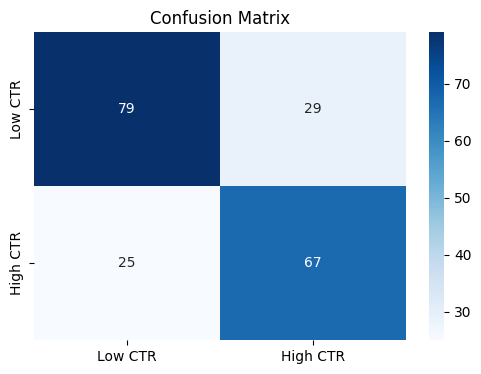

In [14]:
# ------------------------------
# Step 5: Evaluation
# ------------------------------
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Low CTR","High CTR"], yticklabels=["Low CTR","High CTR"])
plt.title("Confusion Matrix")
plt.show()

In [15]:
# ------------------------------
# Step 6: Make Sample Predictions
# ------------------------------
sample_ad = pd.DataFrame({
    "Ad_Budget": [5000],
    "Ad_Platform": le.fit_transform(["Google"]),   # Encode using LabelEncoder
    "Ad_Type": le.fit_transform(["Video"]),
    "Audience_Age": le.fit_transform(["25-34"]),
    "Audience_Interest": le.fit_transform(["Tech"]),
    "Impressions": [4000]
})

sample_ad = scaler.transform(sample_ad)  # scale
prediction = model.predict(sample_ad)
print("\nPrediction for Sample Ad (High CTR=1, Low CTR=0):", prediction[0])


Prediction for Sample Ad (High CTR=1, Low CTR=0): 1
